In [1]:
import numpy as np
import pandas as pd
import pylab as plt

In [2]:
from scipy.stats import spearmanr

In [3]:
def henry_at_diff_temp(k1, h, T1, T2):
    kB = 8.31446261815324
    k2 = np.log(k1) + h * 1000 / kB * (1 / T1 - 1 / T2)

    return np.exp(k2)

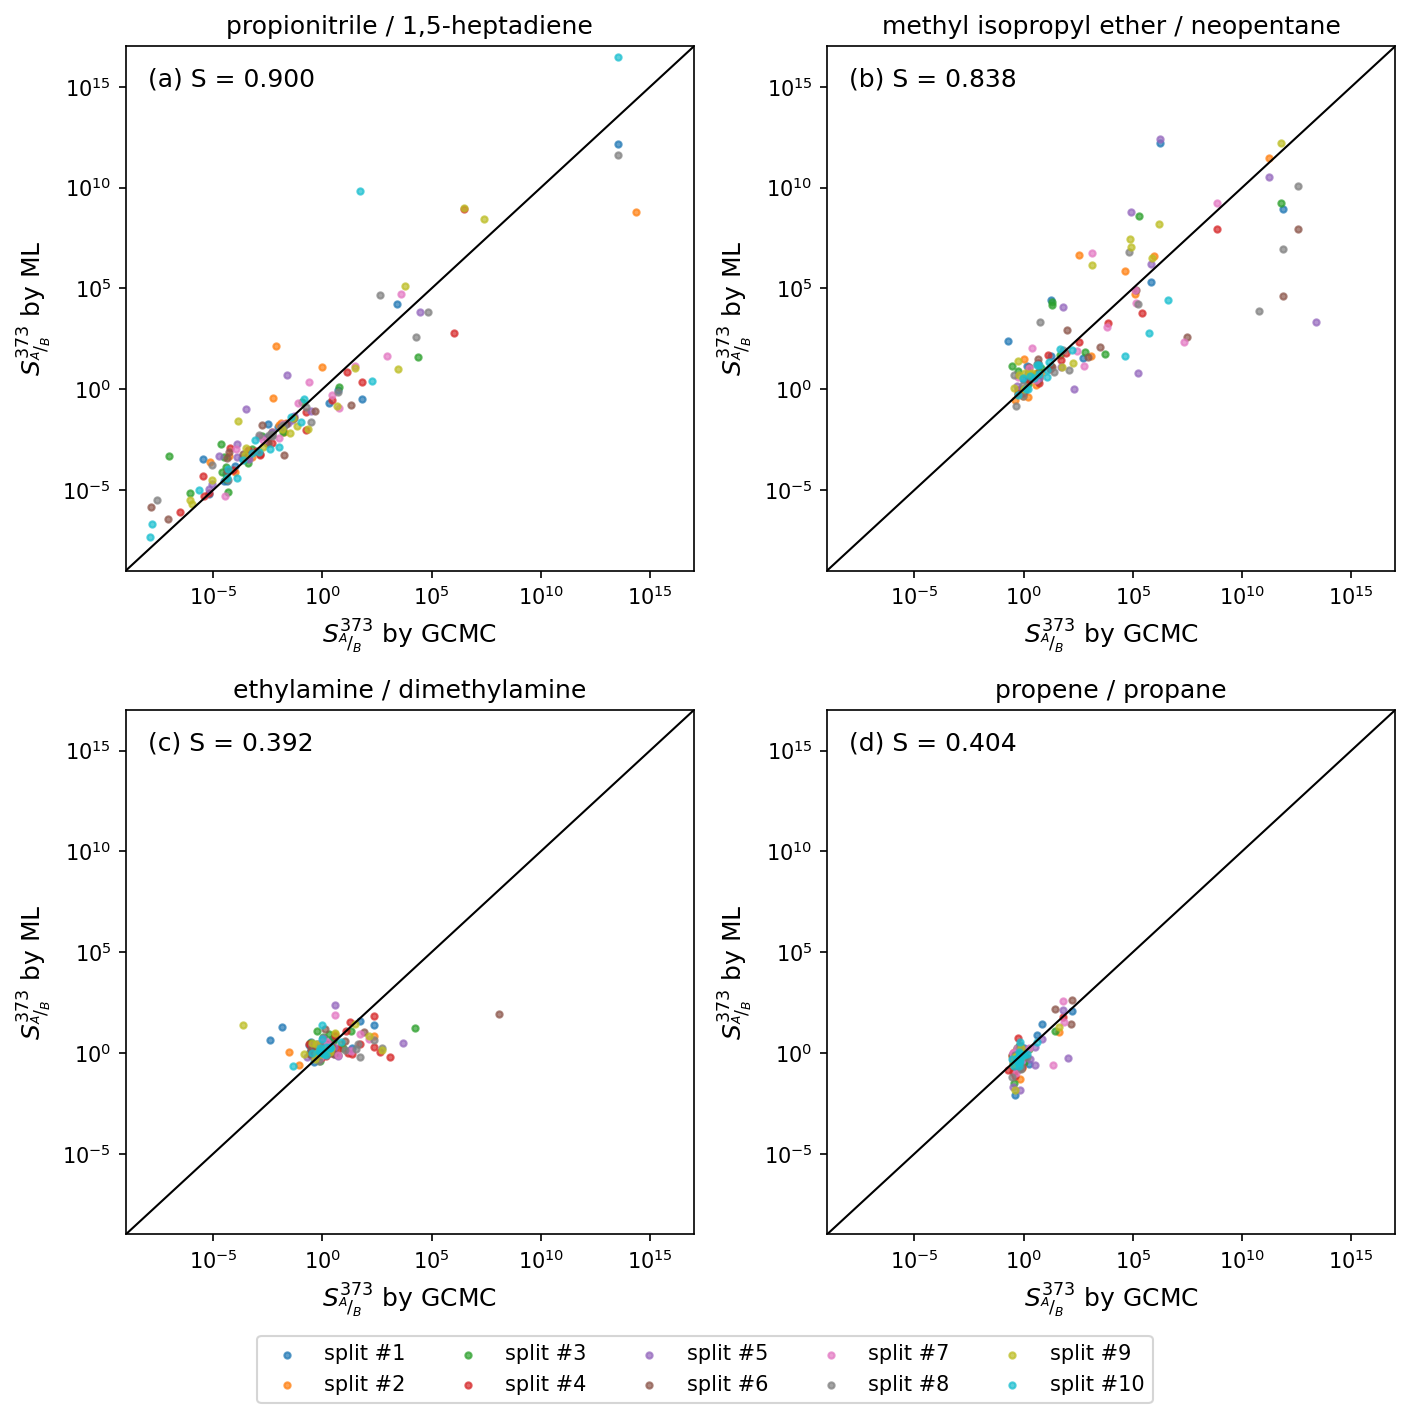

In [7]:
fig, axes = plt.subplots(2, 2, figsize = (9.5, 9), dpi = 150)
axes = axes.ravel()

space = [1e-9, 1e17]

for i in range(len(axes)):
    axes[i].set_xscale('log')
    axes[i].set_yscale('log')
    axes[i].set_xlim(space)
    axes[i].set_ylim(space)
    axes[i].set_xticks(np.logspace(-5, 15, 5))
    axes[i].set_yticks(np.logspace(-5, 15, 5))
    axes[i].set_xlabel('$S_{^{A}/_{B}}^{373}$ by GCMC', fontsize = 'large')
    axes[i].set_ylabel('$S_{^{A}/_{B}}^{373}$ by ML', fontsize = 'large')
    axes[i].plot(space, space, 'k-', lw = 1)

S = [0.900, 0.838, 0.392, 0.404]
letter = ['a', 'b', 'c', 'd']

for j, pairs in enumerate([('propionitrile', '1,5-heptadiene'), ('methyl isopropyl ether', 'neopentane'), ('ethylamine', 'dimethylamine'), ('propene', 'propane')]):
    mol_1, mol_2 = pairs

    for i in range(1, 11):
        df = pd.read_csv('{}/K_test.tsv'.format(i), sep = '\t')
        H = pd.read_csv('{}/H_test.tsv'.format(i), sep = '\t')

        df_1_index = df[df.molecule == mol_1].set_index('MOF')[['K', 'predict']].applymap(lambda x: x > 1e-15).all(axis = 1).values
        df_1 = df[df.molecule == mol_1].loc[df_1_index].set_index('MOF')[['K', 'predict']]
        H_1 = H[H.molecule == mol_1].loc[df_1_index].set_index('MOF')[['H', 'predict']]

        df_2_index = df[df.molecule == mol_2].set_index('MOF')[['K', 'predict']].applymap(lambda x: x > 1e-15).all(axis = 1).values
        df_2 = df[df.molecule == mol_2].loc[df_2_index].set_index('MOF')[['K', 'predict']]
        H_2 = H[H.molecule == mol_2].loc[df_2_index].set_index('MOF')[['H', 'predict']]

        df_1['K_373'] = henry_at_diff_temp(df_1.K, H_1.H, 300, 373)
        df_1['predict_373'] = henry_at_diff_temp(df_1.predict, H_1.predict, 300, 373)
        
        df_2['K_373'] = henry_at_diff_temp(df_2.K, H_2.H, 300, 373)
        df_2['predict_373'] = henry_at_diff_temp(df_2.predict, H_2.predict, 300, 373)
        
        join = df_1.join(df_2, on = ['MOF'], how = 'inner', lsuffix = '_1', rsuffix = '_2')

        join['S_ML'] = join.predict_373_1 / join.predict_373_2
        join['S_GCMC'] = join.K_373_1 / join.K_373_2

        axes[j].scatter(join.S_GCMC, join.S_ML, marker = '.', alpha = .7, label = 'split #{}'.format(i))
        axes[j].set_title('{} / {}'.format(mol_1, mol_2))
        
    text = '({})'.format(letter[j]) + ' S' + ' = {:.3f}'.format(S[j])
    axes[j].text(1e-8, 1e15, text, fontsize = 'large')
#axes[0].set_ylabel('$S_{^{A}/_{B}}$ by ML', fontsize = 'large')
#axes[2].set_ylabel('$S_{^{A}/_{B}}$ by ML', fontsize = 'large')
#axes[2].set_xlabel('$S_{^{A}/_{B}}$ by GCMC', fontsize = 'large')
#axes[3].set_xlabel('$S_{^{A}/_{B}}$ by GCMC', fontsize = 'large')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles = handles, labels = labels, loc = 'center', ncol = 5, bbox_to_anchor = (0.5, -0.02), frameon = True)
plt.tight_layout()

In [5]:
azeo_pairs_train_test = [
    ('propionitrile', '1,5-heptadiene'),
    ('methyl isopropyl ether', 'neopentane'),
    ('propyl alcohol', 'methyl propyl ketone'),
    ('acetonitrile', 'isopropyl alcohol'),
    ('4-methyl-1-hexene', '4,4-dimethyl-1-pentene'),
    ('acetaldehyde', 'ethylamine'),
    ('acetaldehyde', 'dimethylamine'),
    ('methyl propyl ether', '2-pentene'),
    ('propene', 'propane'),
    ('ethylamine', 'dimethylamine')
    ]

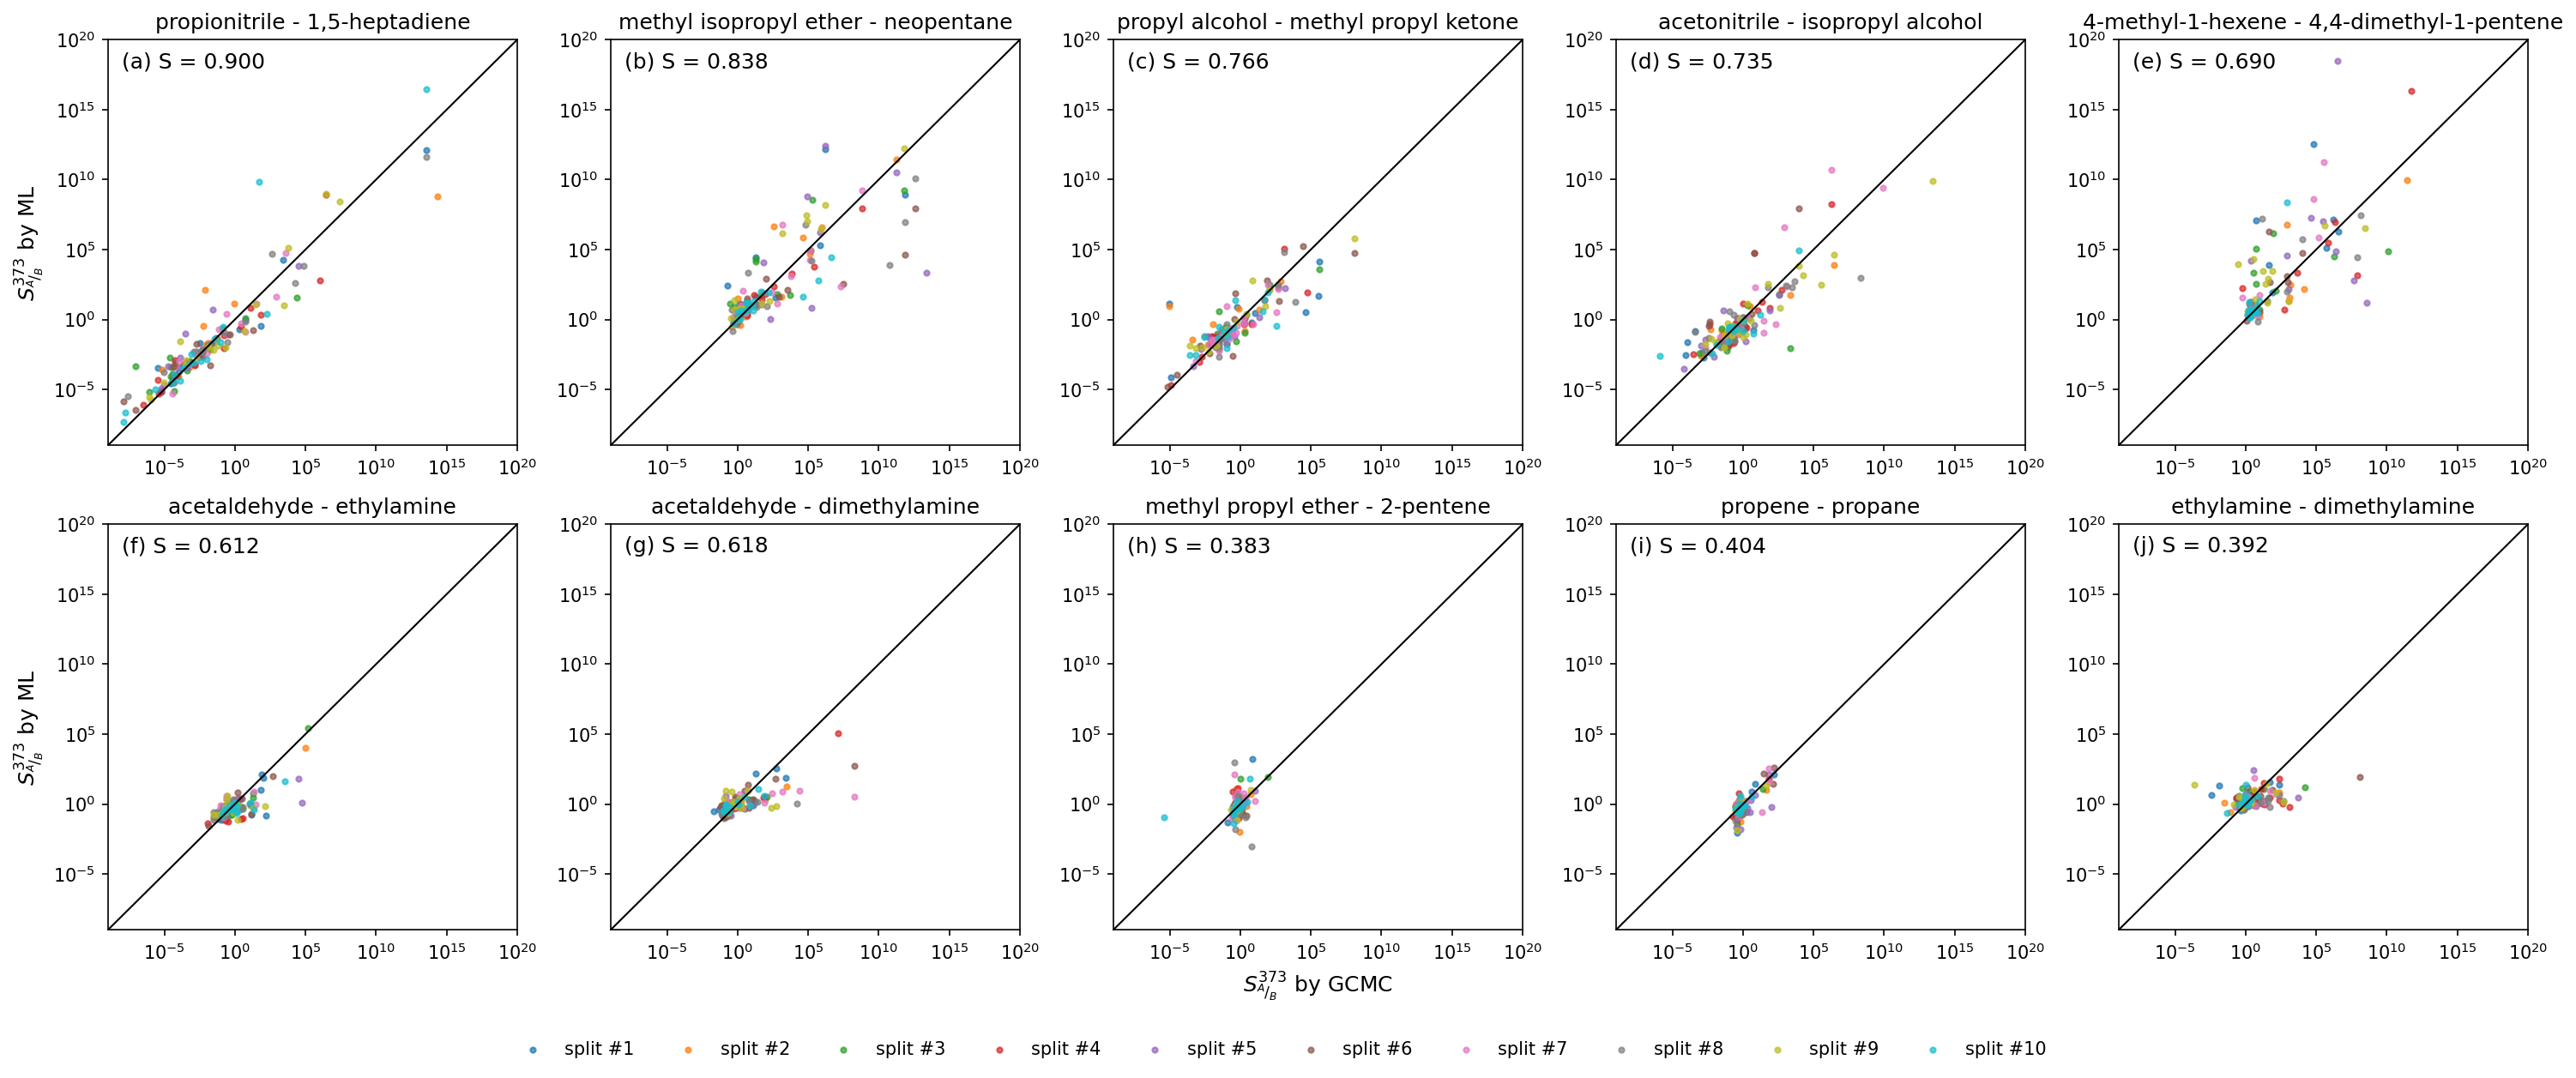

In [10]:
fig, axes = plt.subplots(2, 5, figsize = (20, 8), dpi = 150)
axes = axes.ravel()

space = [1e-9, 1e20]

for i in range(len(axes)):
    axes[i].set_xscale('log')
    axes[i].set_yscale('log')
    axes[i].set_xlim(space)
    axes[i].set_ylim(space)
    axes[i].set_xticks(np.logspace(-5, 20, 6))
    axes[i].set_yticks(np.logspace(-5, 20, 6))
    axes[i].plot(space, space, 'k-', lw = 1)

sel_tsv = open('selectivity_test_373.tsv', 'w')
sel_tsv.write('mol_1\tmol_2\tmean\tstd\n')

letter = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

for j, pairs in enumerate(azeo_pairs_train_test):
    mol_1, mol_2 = pairs

    selectivity = []
    for i in range(1, 11):
        df = pd.read_csv('{}/K_test.tsv'.format(i), sep = '\t')
        H = pd.read_csv('{}/H_test.tsv'.format(i), sep = '\t')

        df_1_index = df[df.molecule == mol_1].set_index('MOF')[['K', 'predict']].applymap(lambda x: x > 1e-15).all(axis = 1).values
        df_1 = df[df.molecule == mol_1].loc[df_1_index].set_index('MOF')[['K', 'predict']]
        H_1 = H[H.molecule == mol_1].loc[df_1_index].set_index('MOF')[['H', 'predict']]

        df_2_index = df[df.molecule == mol_2].set_index('MOF')[['K', 'predict']].applymap(lambda x: x > 1e-15).all(axis = 1).values
        df_2 = df[df.molecule == mol_2].loc[df_2_index].set_index('MOF')[['K', 'predict']]
        H_2 = H[H.molecule == mol_2].loc[df_2_index].set_index('MOF')[['H', 'predict']]

        df_1['K_373'] = henry_at_diff_temp(df_1.K, H_1.H, 300, 373)
        df_1['predict_373'] = henry_at_diff_temp(df_1.predict, H_1.predict, 300, 373)
        
        df_2['K_373'] = henry_at_diff_temp(df_2.K, H_2.H, 300, 373)
        df_2['predict_373'] = henry_at_diff_temp(df_2.predict, H_2.predict, 300, 373)
        
        join = df_1.join(df_2, on = ['MOF'], how = 'inner', lsuffix = '_1', rsuffix = '_2')

        join['S_ML'] = join.predict_373_1 / join.predict_373_2
        join['S_GCMC'] = join.K_373_1 / join.K_373_2

        S = spearmanr(join.S_GCMC, join.S_ML)[0]
        selectivity.append(S)

        axes[j].scatter(join.S_GCMC, join.S_ML, marker = '.', alpha = .7, label = 'split #{}'.format(i))
        axes[j].set_title('{} - {}'.format(mol_1, mol_2))
        
    selectivity = np.array(selectivity)
    sel_tsv.write('{}\t{}\t{}\t{}\n'.format(mol_1, mol_2, selectivity.mean(), selectivity.std()))
    
    text = '({})'.format(letter[j]) + ' S' + ' = {:.3f}'.format(selectivity.mean())
    axes[j].text(1e-8, 1e18, text, fontsize = 'large')

axes[0].set_ylabel('$S_{^{A}/_{B}}^{373}$ by ML', fontsize = 'large')
axes[5].set_ylabel('$S_{^{A}/_{B}}^{373}$ by ML', fontsize = 'large')
axes[7].set_xlabel('$S_{^{A}/_{B}}^{373}$ by GCMC', fontsize = 'large')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles = handles, labels = labels, loc = 'lower center', ncol = 10, bbox_to_anchor = (0.5, -0.05), frameon = False)
plt.tight_layout()

sel_tsv.close()